In [13]:
import random
import alpaca_trade_api as tradeapi
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()


True

In [14]:
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_API_SECRET_ID")


In [15]:
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [16]:
companies = ["AAPL","SPY","TTCF","SPYD","ARW","MXIM","TXN","AMD","NVDA","LSCC","ENPH","RUN","SEDG"]
df = api.get_barset(companies, timeframe="day", limit=300).df

In [17]:
closes = df.xs("close", axis="columns", level=1)
returns = closes.pct_change()
returns.tail()

,AAPL,AMD,ARW,ENPH,LSCC,MXIM,NVDA,RUN,SEDG,SPY,SPYD,TTCF,TXN
2021-03-17 00:00:00-04:00,-0.006132,-0.001691,0.012761,-0.012835,0.017758,0.010644,0.004893,0.003343,0.021237,0.003233,0.006606,-0.012368,0.012757
2021-03-18 00:00:00-04:00,-0.034054,-0.054574,-0.013057,-0.093761,-0.075047,-0.034668,-0.047174,-0.097860,-0.086579,-0.014627,-0.009339,-0.021104,-0.028592
2021-03-19 00:00:00-04:00,-0.005641,0.012031,0.009529,0.044928,0.011591,0.014774,0.009906,0.080482,0.055451,-0.004880,-0.022930,-0.013504,0.009696
2021-03-22 00:00:00-04:00,0.029198,0.015429,-0.000641,0.038548,0.005167,0.015119,0.026507,0.032386,0.028333,0.007805,-0.004954,-0.019693,0.023582
2021-03-23 00:00:00-04:00,-0.006566,-0.026653,-0.039523,-0.033394,-0.035986,-0.022948,-0.002313,-0.014814,-0.036622,-0.004658,-0.015985,-0.021063,-0.009743


In [18]:
correlation = returns.corr()

In [19]:
%matplotlib inline

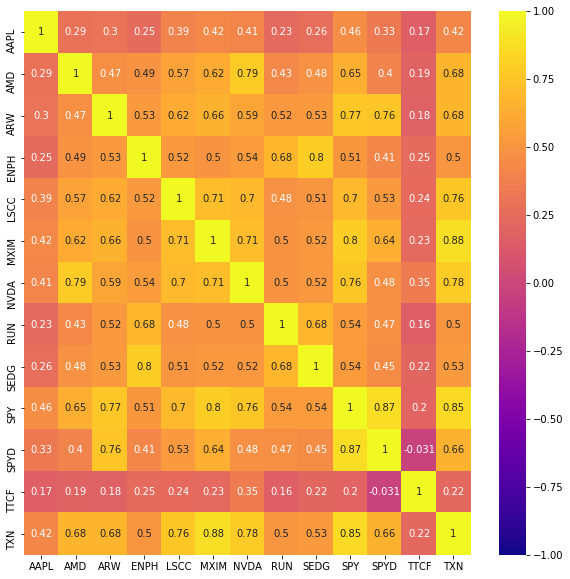

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmin=-1, vmax=1, cmap="plasma", annot=True)

In [24]:
preweight = [random.random() for w in range(13)]
weightsum = sum(preweight)
weights = [w/weightsum for w in preweight]

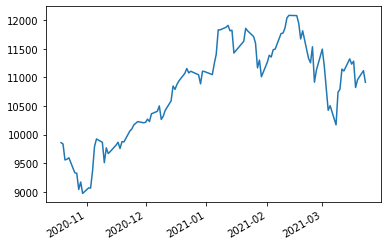

In [25]:
initial = 10000
portfolio_returns = returns.dot(weights)
cumulative_returns = (1+portfolio_returns).cumprod()

(initial*cumulative_returns).plot()

In [26]:
import pandas as pd

In [27]:
results = pd.DataFrame({
    "Weights":[],
    "Total_Return":[],
    "Risk":[],
    "Sharpe":[]
})

trials = 5000
risk_free_rate = 0.0072

for trial in range(trials):

    # generate a random set of weight sfor my portfolio
    preweight = [random.random() for w in range(13)]
    weightsum = sum(preweight)
    weights = [w/weightsum for w in preweight]

    # calculate this trial's portfolio's returns and cumulative returns
    initial = 10000
    portfolio_returns = returns.dot(weights)
    cumulative_returns = (1+portfolio_returns).cumprod()

    # calculuate portolio return risk and total return
    risk = portfolio_returns.std()
    total_return = cumulative_returns[-1]

    results = results.append({
        "Weights":weights,
        "Total_Return":total_return,
        "Risk":risk,
        "Sharpe": (total_return - risk_free_rate)/risk
    }, ignore_index=True)

results.head()

,Weights,Total_Return,Risk,Sharpe
0,"[0.018918108716279313, 0.02212560266285129, 0....",1.147813,0.020744,54.986228
1,"[0.014719284614189507, 0.11621883289232247, 0....",1.119098,0.021384,51.995540
2,"[0.13872936000377956, 0.08599681320920143, 0.1...",1.143470,0.017359,65.456407
3,"[0.04668200573694138, 0.14044875850109206, 0.0...",1.122397,0.019277,57.851751
4,"[0.07624552176301033, 0.09176742604233881, 0.1...",1.091211,0.019958,54.315508


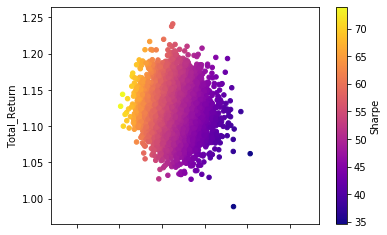

In [28]:
results.plot(kind="scatter", x="Risk", y="Total_Return", c="Sharpe", colormap="plasma")

In [30]:
results[results["Sharpe"]>60].sort_values("Sharpe", ascending=False)

,Weights,Total_Return,Risk,Sharpe
4499,"[0.14380944254773076, 0.022194766472969512, 0....",1.127367,0.015138,73.996312
2169,"[0.1415106959469534, 0.003935320249869883, 0.1...",1.143807,0.015370,73.949742
1305,"[0.09839169626214594, 0.04654657867400781, 0.1...",1.137829,0.015953,70.871899
3616,"[0.1584810632067018, 0.08968704517587482, 0.12...",1.116178,0.015660,70.816214
3553,"[0.1745305916338596, 0.06762613824727547, 0.10...",1.099972,0.015457,70.698063
...,...,...,...,...
3287,"[0.08800459249880081, 0.09754708245331346, 0.0...",1.121283,0.018562,60.020205
3451,"[0.08422608356525481, 0.13059863897224236, 0.0...",1.131180,0.018728,60.016981
696,"[0.09842540786225587, 0.06654392395075037, 0.0...",1.128646,0.018686,60.014640
2605,"[0.17257044377410735, 0.06462990143108487, 0.0...",1.121464,0.018568,60.008907


In [32]:
results.iloc[4499]["Weights"]

[0.14380944254773076,
 0.022194766472969512,
 0.14836234586069688,
 0.017367586324737862,
 0.032512667779390485,
 0.027303056908099647,
 0.03825514007161565,
 0.003951222130441185,
 0.0027190373816460287,
 0.1345787973521663,
 0.14113002663465365,
 0.1389609393831686,
 0.1488549711526834]

In [33]:
best_weight = results.iloc[2169]["Weights"]

In [34]:
portfolio = pd.DataFrame(list(zip(companies,best_weight)))
portfolio.columns = ["company","weight"]
portfolio["equity"] = portfolio["weight"]*initial
portfolio

,company,weight,equity
0,AAPL,0.141511,1415.106959
1,SPY,0.003935,39.353202
2,TTCF,0.159775,1597.754811
3,SPYD,0.029302,293.015342
4,ARW,0.015250,152.503872
5,MXIM,0.109300,1093.000358
6,TXN,0.048474,484.737269
7,AMD,0.037007,370.068920
8,NVDA,0.028158,281.576148
9,LSCC,0.168208,1682.076961
